<a href="https://colab.research.google.com/github/OJB-Quantum/Notebooks/blob/main/Simple_Knot_Formation_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Assume that this notebook has the matplotlib installed.

In [1]:
!pip install pybullet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 MB 4.4 MB/s eta 0:00:00


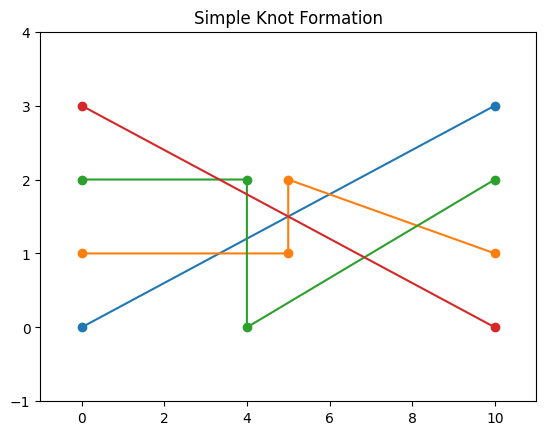

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def draw_string(ax, points):
    """ Draw a single string based on a list of points """
    ax.plot([p[0] for p in points], [p[1] for p in points], marker='o')

def simulate_knot():
    # Creating a figure
    fig, ax = plt.subplots()

    # Define the initial positions of four parallel strings
    string1 = [(0, 0), (10, 0)]
    string2 = [(0, 1), (10, 1)]
    string3 = [(0, 2), (10, 2)]
    string4 = [(0, 3), (10, 3)]

    # Apply a simple 'knotting' algorithm
    # This will just cross the strings over each other in a simple pattern
    string1[1] = (10, 3)
    string2.insert(1, (5, 1))
    string2.insert(2, (5, 2))
    string3.insert(1, (4, 2))
    string3.insert(2, (4, 0))
    string4[1] = (10, 0)

    # Drawing the strings
    draw_string(ax, string1)
    draw_string(ax, string2)
    draw_string(ax, string3)
    draw_string(ax, string4)

    # Setting the limits for x and y axis
    ax.set_xlim(-1, 11)
    ax.set_ylim(-1, 4)

    # Display the plot
    plt.title("Simple Knot Formation")
    plt.show()

simulate_knot()


In [ ]:
import pybullet as p
import time
import pybullet_data

physicsClient = p.connect(p.GUI)  # Start PyBullet in GUI mode

p.setGravity(0, 0, -10)  # Set gravity
p.setAdditionalSearchPath(pybullet_data.getDataPath())  # Set path for PyBullet data

planeId = p.loadURDF("plane.urdf")  # Load a simple plane to act as the ground

# Function to create a soft body representing a string
def create_string(start_pos, end_pos):
    string = p.createSoftBodyAnchorCloth(
        start_pos[0], start_pos[1], start_pos[2],
        end_pos[0], end_pos[1], end_pos[2],
        2, 2, 0, 4
    )
    return string

# Create four strings
strings = [
    create_string([0, 0, 3], [0, 1, 3]),
    create_string([0, 1, 3], [0, 2, 3]),
    create_string([0, 2, 3], [0, 3, 3]),
    create_string([0, 3, 3], [0, 4, 3])
]

# Run the simulation
for i in range(1000):
    p.stepSimulation()
    time.sleep(1./240.)  # Time step of simulation

p.disconnect()  # Disconnect from the simulation
